# Query from bigQuery :
```
SELECT
      limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6,
      bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6,
      pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, 
      default_payment_next_month
FROM `bigquery-public-data.ml_datasets.credit_card_default`
LIMIT 31984;
```

# 1. Perkenalan
- Nama  : Muhammad Julizar
- Batch : FTDS-RMT-16

## Dataset : ml_datasets<br> Data base: Credit card default 
## Objektif : Membuat memprediksi default_payment_next_month dengan menggunakan model Classification terbaik dari 7 model yang telah ditentukan.

# 2. Import Library

In [1]:
# Importing  library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay
from sklearn import tree
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Data Loading

In [2]:
# Load data
df = pd.read_csv('D:\Hacktiv 8\Full time Data Science\Phase 1\Milestone\Milestone1\h8dsft_P1M1_Muhammad_Julizar.csv')

In [3]:
# Menampilkan 5 data teratas
df.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,3,0,50.0,0.0,0.0,0.0,-1.0,-1,-1,45771.0,23343.0,0.0,3400.0,2769.0,0.0,2266.0,0.0,3400.0,2769.0,1700.0,0.0,0
1,200000.0,2,3,0,45.0,-2.0,-2.0,-2.0,-2.0,-2,-2,399.0,2430.0,0.0,399.0,1396.0,0.0,2430.0,0.0,399.0,1396.0,0.0,0.0,0
2,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,0,58180.0,59134.0,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
3,230000.0,1,2,1,41.0,0.0,0.0,0.0,0.0,0,0,301038.0,305327.0,213058.0,216260.0,215968.0,174195.0,9405.0,7769.0,7757.0,8030.0,6549.0,5226.0,1
4,50000.0,1,2,1,42.0,0.0,0.0,0.0,0.0,0,2,35892.0,32546.0,30660.0,31320.0,36227.0,35569.0,2007.0,2000.0,1500.0,5400.0,0.0,3000.0,0


In [4]:
# Menampilkan 5 data terbawah
df.tail()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2960,320000.0,1,2,1,41.0,1.0,-2.0,-2.0,-2.0,-2,-2,0.0,0.0,0.0,0.0,700.0,860.0,0.0,0.0,0.0,700.0,860.0,2420.0,1
2961,20000.0,1,1,1,39.0,-1.0,-1.0,-1.0,-1.0,-1,-1,628.0,662.0,596.0,630.0,664.0,598.0,700.0,600.0,700.0,700.0,600.0,1400.0,0
2962,20000.0,1,2,2,25.0,0.0,0.0,0.0,0.0,0,0,13429.0,14502.0,15564.0,16600.0,17025.0,17381.0,1300.0,1300.0,1300.0,700.0,630.0,650.0,0
2963,50000.0,1,2,2,38.0,0.0,0.0,0.0,0.0,0,0,42856.0,29248.0,17775.0,17833.0,18246.0,18642.0,1300.0,1600.0,650.0,700.0,700.0,700.0,0
2964,100000.0,2,1,2,28.0,0.0,0.0,0.0,2.0,0,0,10886.0,11697.0,14479.0,10775.0,10998.0,12655.0,1300.0,3005.0,0.0,700.0,2000.0,1500.0,0


In [5]:
# Menampilkan info pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   int64  
 10  pay_6                       2965 non-null   int64  
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

Terdapat 2965 baris dan 24 kolom pada dataset kali ini, dengan tipe data float64 dan int64

In [6]:
# menampilkan info central tendency pada dataset
df.describe()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
count,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2.965000e+03,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000
mean,163369.308600,1.607757,1.849578,1.559865,35.193255,0.005059,-0.122428,-0.141653,-0.185160,-0.225295,-0.254637,52118.305228,50649.153120,48239.757504,44089.683305,40956.080607,39773.072513,6348.902867,6.272494e+03,5150.497133,4561.376054,4913.286678,5382.701518,0.214165
std,125030.415472,0.488333,0.778184,0.522317,9.109439,1.114395,1.180784,1.183630,1.178322,1.159003,1.167305,72328.670541,70785.001588,68145.710745,61907.454056,58271.904751,57303.488981,20885.735336,2.887967e+04,14287.079982,13281.499599,16734.340778,17275.953029,0.410311
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-11545.000000,-67526.000000,-25443.000000,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3958.000000,3390.000000,3302.000000,2582.000000,1958.000000,1430.000000,1013.000000,9.900000e+02,477.000000,313.000000,323.000000,173.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24257.000000,23111.000000,21520.000000,19894.000000,18814.000000,18508.000000,2234.000000,2.175000e+03,1994.000000,1600.000000,1646.000000,1615.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69852.000000,67827.000000,63023.000000,58622.000000,53373.000000,52287.000000,5087.000000,5.000000e+03,4500.000000,4000.000000,4021.000000,4081.000000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,7.000000,613860.000000,512650.000000,578971.000000,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000,1.000000


In [7]:
# Memeriksa unique value pada setiap kolom
df.nunique()

limit_balance                   59
sex                              2
education_level                  7
marital_status                   4
age                             49
pay_0                           11
pay_2                           10
pay_3                            9
pay_4                           10
pay_5                            9
pay_6                            8
bill_amt_1                    2643
bill_amt_2                    2592
bill_amt_3                    2549
bill_amt_4                    2504
bill_amt_5                    2482
bill_amt_6                    2461
pay_amt_1                     1415
pay_amt_2                     1372
pay_amt_3                     1302
pay_amt_4                     1214
pay_amt_5                     1194
pay_amt_6                     1189
default_payment_next_month       2
dtype: int64

# EDA (Explorataory Data Analysis)

In [8]:
# memeriksa missing values
df.isna().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

Dari hasil tidak terdapat missing value

In [9]:
# melihat value apa saja pada kolom marital status
df.groupby('marital_status')[['marital_status']].count()

,marital_status
marital_status,
0,4
1,1332
2,1594
3,35


Terdapat 4 kategori marita status, namun dari source data di bigQuery hanya memiliki 3 kategori, sehingga value 0 dapat kita hapus nanti di data preprocessing

In [10]:
# melihat terdapat value apa saja pada kolom education level
df.groupby('education_level')[['education_level']].count()

,education_level
education_level,
0,2
1,1039
2,1400
3,483
4,13
5,24
6,4


Ada 6 education_level, namun nomor 0,5,6 mendiskripsikan 'unknown' dan nomor 4 mendeskripsikan 'other'  (BigQuery)

Membuat fungsi utk melihat skewness data

In [11]:
def skew(data):
    print(data.skew())
    if data.skew() > 0.5:
        print('right skewed')
    elif data.skew()<-0.5:
        print('left skewed')
    else:
        print('normal')

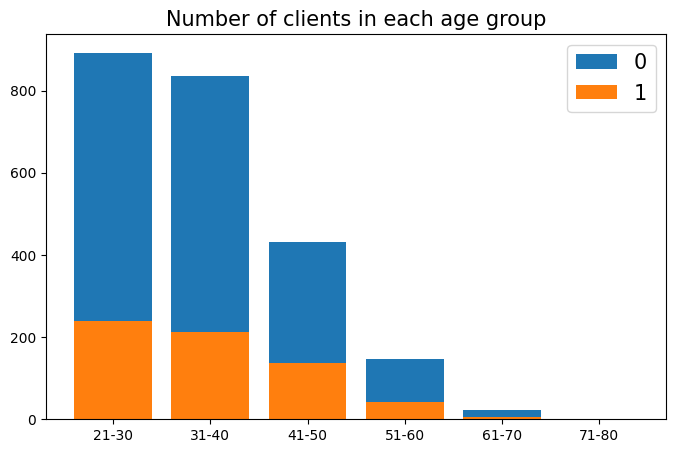

In [12]:
# membuat barchart
bins = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']
df1 = pd.cut(x=df.age, bins=bins, labels=names, right=True)

# Memisahkan data berdasarkan valuenya
age_cnt = df1.value_counts()
age_0 = (df1[df['default_payment_next_month'] == 0].value_counts())
age_1 = (df1[df['default_payment_next_month'] == 1].value_counts())


# Barplot data
plt.subplots(figsize=(8,5))
plt.bar(age_0.index, age_0.values, label='0')
plt.bar(age_1.index, age_1.values, label='1')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Number of clients in each age group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

Dari data diatas penggunaan credit card terbanyak ada pada kelompok usia 21-30 tahun diikut, 31-40 dan seterusnya.<br>
Setiap kelompok usia didominasi oleh org yg tidak membayar secara langsung credit card.<br>
dapat disimpulkan bahwa semakin tua semakin sedikit penggunaan credit card

C:\Users\Muhammad Julizar\AppData\Local\Temp\ipykernel_4728\2969188587.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,1)


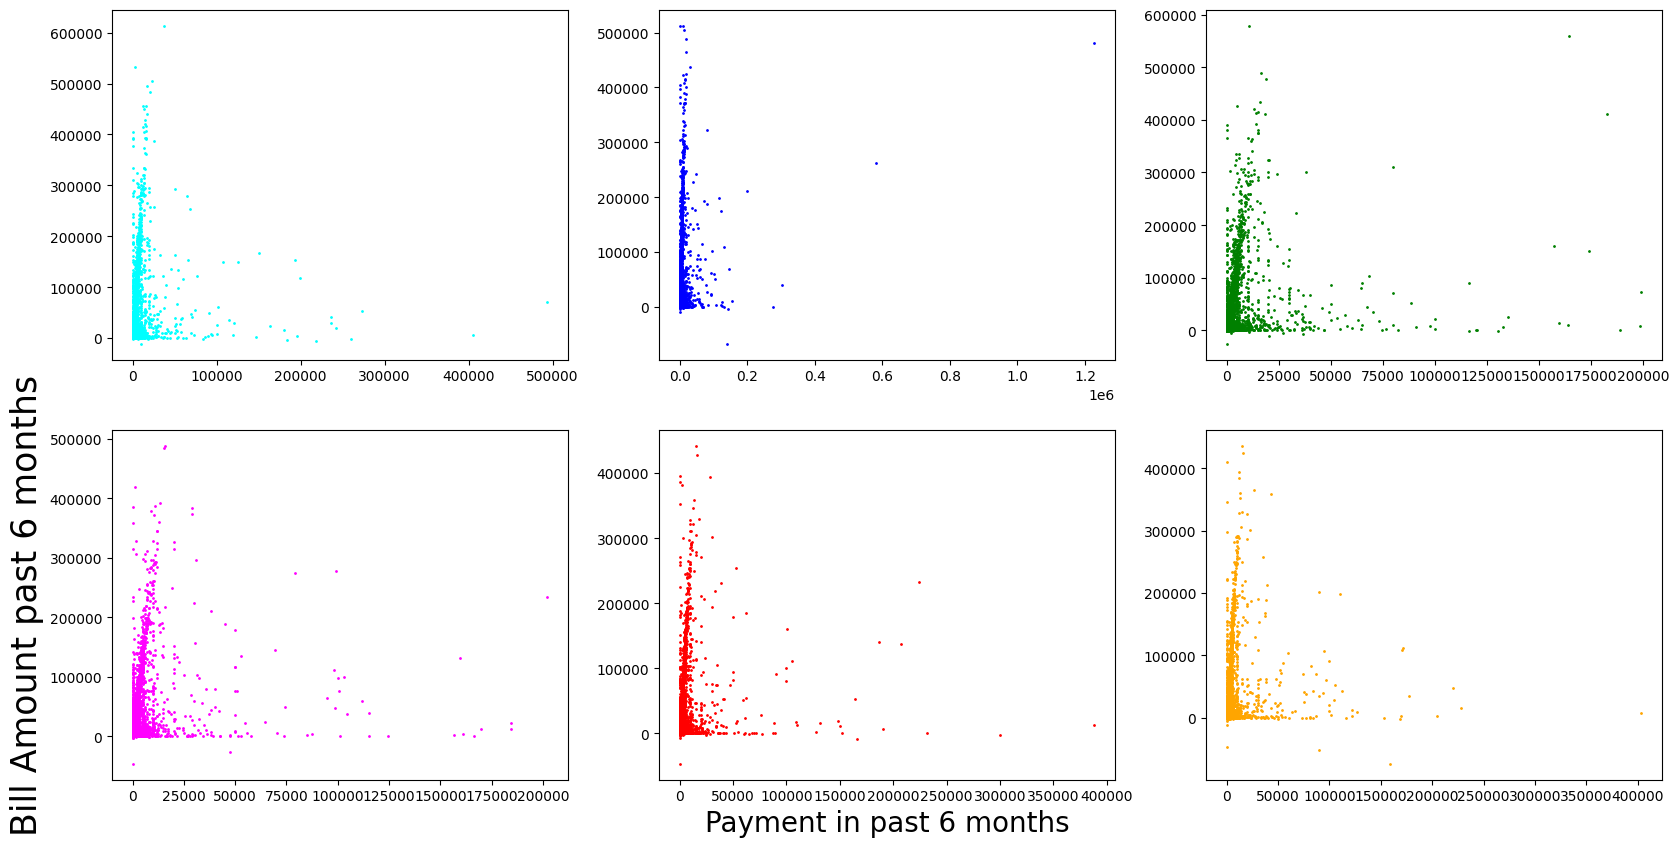

In [13]:
# membuat scatter plot
plt.subplots(figsize=(20,10))

plt.subplot(2,3,1)
plt.scatter(x=df.pay_amt_1, y=df.bill_amt_1, color='cyan', s=1)

plt.subplot(2,3,2)
plt.scatter(x=df.pay_amt_2, y=df.bill_amt_2, color='blue', s=1)

plt.subplot(2,3,3)
plt.scatter(x=df.pay_amt_3, y=df.bill_amt_3, color='green', s=1)

plt.subplot(2,3,4)
plt.scatter(x=df.pay_amt_4, y=df.bill_amt_4, color='magenta', s=1)
plt.ylabel("Bill Amount past 6 months", fontsize=25)

plt.subplot(2,3,5)
plt.scatter(x=df.pay_amt_5, y=df.bill_amt_5, color='red', s=1)
plt.xlabel("Payment in past 6 months", fontsize=20)

plt.subplot(2,3,6)
plt.scatter(x=df.pay_amt_6, y=df.bill_amt_6, color='orange', s=1)

plt.show()

Pada data diatas dapat kita lihat bahwa kebanyakan dari pemegang kartu kredit memiliki tagihan yang tinggi namun tidak langsung melakukan pembayaran hal ini dapat ditunjukkan pada titik-titik data yang banyak berkumpul dekat dengan angka 0 pada sumbu X

In [14]:
# check columns
df.columns

Index(['limit_balance', 'sex', 'education_level', 'marital_status', 'age',
       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6', 'default_payment_next_month'],
      dtype='object')

1.0004416437793329
right skewed


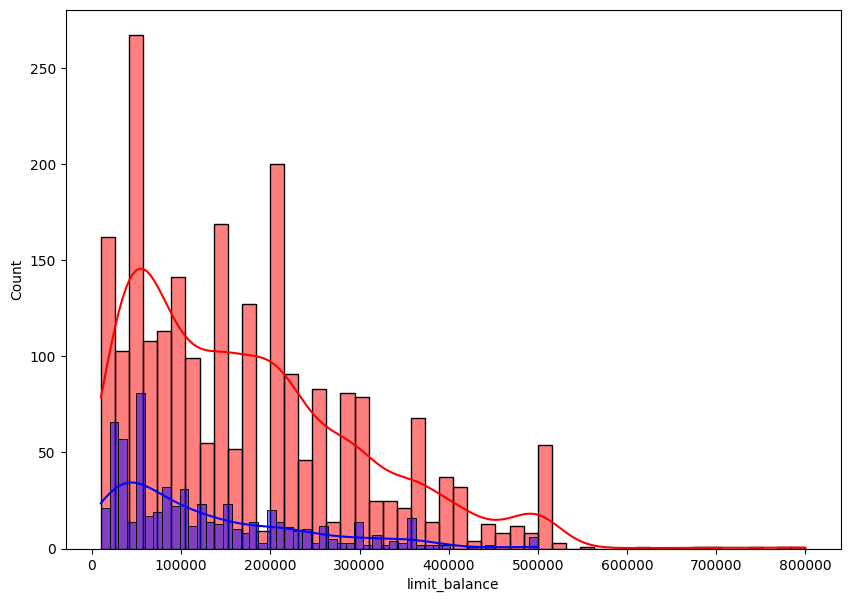

In [15]:
# memanggil fungsi skew ness
skew(df.limit_balance)

# memisahkan value 0 dan 1 pada default_payment
limit_0 = df.loc[df['default_payment_next_month'] == 0]['limit_balance']
limit_1 = df.loc[df['default_payment_next_month'] == 1]['limit_balance']

# membuat histogram perbandingan antara value 0 dan 1
plt.figure(figsize = (10,7))
sns.histplot(limit_0,kde=True,bins=50, color="red")
sns.histplot(limit_1,kde=True,bins=50, color="blue")

plt.show()


Pada gambar diatas bisa kita bandingkan bahwa lebih banyak data yang tidak melakukan default payment next month dengan gambar yang berwarna merah, dibandingkan yg melakukan berwana biru danjuga dapat kita lihat bahwa banyak data dari limit kartu kredit berada di kisaran $50,0000.

# Data Preprocessing

In [16]:
# change column name

df = df.rename(columns={'pay_0':'pay_1', 'default_payment_next_month':'default_payment'})

In [17]:
# menghapus value 0 pada kolom marital status
df= df[df['marital_status'] != 0]

Menghapus data yg memiliki value 0 pada marital status

In [18]:
# mengganti value 0,5,6 pada kolom education level menjadi value 4 = other
df['education_level'] = df['education_level'].replace([0, 5, 6], 4 )

Mengganti data 0,5,6 dengan keterangan unknown menjadi valule 4 dengan keterangan others


## Split data inference

In [19]:
# memisahkan daata inference
data_inf = df.sample(25, random_state=7)
df_train_test = df.drop(data_inf.index)
df_train_test.reset_index(drop=True,inplace=True)
df_train_test.head()

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment
0,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,0,58180.0,59134.0,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
1,230000.0,1,2,1,41.0,0.0,0.0,0.0,0.0,0,0,301038.0,305327.0,213058.0,216260.0,215968.0,174195.0,9405.0,7769.0,7757.0,8030.0,6549.0,5226.0,1
2,50000.0,1,2,1,42.0,0.0,0.0,0.0,0.0,0,2,35892.0,32546.0,30660.0,31320.0,36227.0,35569.0,2007.0,2000.0,1500.0,5400.0,0.0,3000.0,0
3,140000.0,2,2,1,34.0,0.0,0.0,0.0,0.0,0,0,132541.0,136186.0,139418.0,140962.0,137819.0,137094.0,7000.0,7000.0,5300.0,5300.0,10100.0,5400.0,0
4,20000.0,2,2,1,49.0,0.0,0.0,0.0,0.0,0,0,13561.0,14573.0,15290.0,16300.0,16624.0,16974.0,1543.0,1260.0,1270.0,594.0,617.0,1425.0,1


## Split data train test

In [20]:
# menentukan features and target
X =  df_train_test.drop(['default_payment'], axis=1)
y = df_train_test['default_payment']

In [21]:
# memisahkan data train dan test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=78, stratify=y)
print(f'Data train : {X_train.shape}')
print(f'Data test : {X_test.shape}')

Data train : (2348, 23)
Data test : (588, 23)


## Handling outlier

In [22]:
# memeriksa central tendency pada data train
X_train.describe()

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
count,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.00000,2.348000e+03,2348.000000,2348.000000,2348.000000,2348.000000
mean,161988.926746,1.604344,1.841141,1.559199,35.283220,0.024702,-0.107325,-0.134157,-0.174617,-0.218910,-0.249574,52108.005963,50318.488501,47995.195486,43818.325383,40711.594549,39634.619676,6207.13075,6.502423e+03,5275.806644,4760.394378,4934.066440,5420.037479
std,124148.933527,0.489095,0.743025,0.518417,9.119214,1.124649,1.190245,1.185903,1.173926,1.145466,1.155146,71692.949524,70136.166736,67197.580839,60923.440256,57260.544356,56448.515343,20680.37169,3.155235e+04,14873.455563,14186.260476,16711.129103,17508.075066
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-11545.000000,-67526.000000,-25443.000000,-46627.000000,-46627.000000,-73895.000000,0.00000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4167.500000,3547.500000,3430.500000,2867.250000,2100.000000,1636.500000,1019.75000,1.000000e+03,479.250000,331.500000,370.500000,234.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24479.500000,23169.000000,21698.500000,19955.000000,19176.500000,18791.000000,2238.00000,2.182000e+03,1946.000000,1640.500000,1656.000000,1700.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69982.000000,67717.750000,62832.250000,58219.500000,53414.500000,52297.000000,5072.00000,5.000000e+03,4500.000000,4000.000000,4023.500000,4153.750000
max,800000.000000,2.000000,4.000000,3.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,7.000000,613860.000000,512650.000000,559712.000000,488808.000000,427064.000000,436172.000000,493358.00000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000


In [23]:
# melihat skewness pada data train agar dapat dilakukan pemrosesan outlier
X_train.skew()

limit_balance       1.009685
sex                -0.427046
education_level     0.476047
marital_status      0.000732
age                 0.756131
pay_1               1.028847
pay_2               0.936097
pay_3               0.961671
pay_4               1.115223
pay_5               1.066558
pay_6               0.961479
bill_amt_1          2.463540
bill_amt_2          2.460092
bill_amt_3          2.503316
bill_amt_4          2.434951
bill_amt_5          2.371615
bill_amt_6          2.431397
pay_amt_1          12.931701
pay_amt_2          28.143690
pay_amt_3           7.777112
pay_amt_4           8.217052
pay_amt_5          11.942627
pay_amt_6          10.390466
dtype: float64

Dari data skew diatas dapat kita lihat, terdapat 2 kolom yang perlu di hapus outlier nya yaitu kolom limit_balnace dan, age.<br>Kolom lain memiliki skewness yang tinggi namun outlier nya bersifat natural

#### Membuat fungsi IQR
Alasan memilih metode IQR pada data kali ini adalah dikarenakan data distribusi terlihat tidak normal

In [24]:
# make function IQR

def boundaries(data, variable):    
    IQR= data[variable].quantile(0.75) - data[variable].quantile(0.25)
    
    lower_limit = data[variable].quantile(0.25) - (IQR*1.5)
    upper_limit = data[variable].quantile(0.75) + (IQR*1.5)
    
    return lower_limit, upper_limit

In [25]:
# menentukan lower limit dan upper limit dari kolom limit balance
lower_limit_balance, upper_limit_balance = boundaries(X_train, 'limit_balance')

# menghapus outlier
X_train_no_outliers = X_train[(X_train.limit_balance > lower_limit_balance)&(X_train.limit_balance < upper_limit_balance)] 
print(f'Jumlah row dan kolom : {X_train_no_outliers.shape}')

print(f'Jumlah outlier pada kolom age : {len(X_train)-len(X_train_no_outliers)}')

Jumlah row dan kolom : (2293, 23)
Jumlah outlier pada kolom age : 55


Dari penghapusan outlier didapatkan 55 jumlah outlier pada kolom limit balance

In [26]:
# menentukan lower limit dan upper limit dari kolom age
lower, upper = boundaries(X_train, 'age')

X_train_no_outliers1 = X_train_no_outliers[(X_train_no_outliers.age > lower)&(X_train_no_outliers.age < upper)] 
print(f'Jumlah row dan kolom : {X_train_no_outliers.shape}')

print(f'Jumlah outlier pada kolom age : {len(X_train_no_outliers)-len(X_train_no_outliers1)}')

Jumlah row dan kolom : (2293, 23)
Jumlah outlier pada kolom age : 20


Dari penghapusan outlier didapatkan 55 jumlah outlier pada kolom age

In [27]:
# membuat index y_train sama dengan X_train
y_train = y_train.loc[X_train_no_outliers1.index]

y_train.shape

(2273,)

## Feature Selection

P_value <= 0.05 : Use feature<br>
P_value > 0.05  : Delete feature

In [28]:
# membuat variabel untuk dilakukan seleksi feature
numerical= ['limit_balance', 'age']
categorical = ['sex','education_level','marital_status']

In [29]:
# membuat variabel baru dengan kolom yang sudah ditentukan
categorical_feature = X_train_no_outliers1[categorical]
numerical_feature = X_train_no_outliers1[numerical]

In [30]:
# melakukan ordinal encoder pada categorical feature
oe = OrdinalEncoder ()
oe.fit_transform(categorical_feature)

cat_feature = oe.transform(categorical_feature)

### Numerical Fetaure selection using ANOVA

In [31]:
# Feature selection using ANOVE
anova = SelectKBest(score_func=f_classif, k=2)
anova.fit_transform(numerical_feature, y_train)
pd.set_option('display.precision', 5)
anova_score = pd.DataFrame({'Anova_score':anova.scores_, 'P_value_anova': anova.pvalues_}, index=numerical_feature.columns )
anova_score



,Anova_score,P_value_anova
limit_balance,60.49261,1.11160e-14
age,2.11853,1.45664e-01


Kolom age memiliki p_value > 0.05 sehingga feature tersebut harus di drop, dan kita hanya memakai kolom limit balance

### Categorical feature selection using chi square

In [32]:
chi = SelectKBest(score_func=chi2, k=2)
chi.fit_transform(categorical_feature, y_train)

score = pd.DataFrame({'Chi2_score':chi.scores_, 'P_value_chi': chi.pvalues_}, index= categorical_feature.columns )
score

,Chi2_score,P_value_chi
sex,0.16537,0.68426
education_level,1.85605,0.17308
marital_status,0.79368,0.37299


Kolom sex, marital_status memiliki p_value > 0.05 yang menunjukkan kedua feature tersebut harus di drop

### Sehingga kolom yang perlu di drop atau dihapus adalah = age, marital_status dan sex

## Split kolom sesuai dengan treatment nya saat di scalling maupun di encode

In [33]:
# memilih beberapa kolom yang akan dipakai dan menyeleksi kolom yang dilakukan feature selection

numerical_for_scalling = ['limit_balance','bill_amt_1','bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
                                        'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5','pay_amt_6']

categorical_not_encode = ['education_level','pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

In [34]:
# memisahkan data yang akan di scalling dan encoding

X_train_num = X_train_no_outliers1[numerical_for_scalling]
X_test_num = X_test[numerical_for_scalling]

X_train_not_encoded = X_train_no_outliers1[categorical_not_encode]
X_test_not_encoded = X_test[categorical_not_encode]

## Scalling using MinMaxScaler

In [35]:
# melihat distribusi data berdasarkan skewness data
X_train_no_outliers1.skew()

limit_balance       0.77723
sex                -0.44088
education_level     0.47921
marital_status     -0.02991
age                 0.62973
pay_1               1.01283
pay_2               0.91555
pay_3               0.95742
pay_4               1.12951
pay_5               1.07826
pay_6               0.95637
bill_amt_1          2.29716
bill_amt_2          2.31495
bill_amt_3          2.45169
bill_amt_4          2.51595
bill_amt_5          2.46093
bill_amt_6          2.47733
pay_amt_1          11.06376
pay_amt_2          17.68583
pay_amt_3           7.94880
pay_amt_4           8.74282
pay_amt_5          10.62321
pay_amt_6          11.46014
dtype: float64

Dikarenakan data numerical yang ada pada dataset semuanya bersifat skewed, maka teknik scale yang harus digunakan adalah Normalized(MinMaxScaler)

In [36]:
# melakukan normalized scalling dengan minmaxscaler
normalized = MinMaxScaler()
normalized.fit(X_train_num)

X_train_scalled = normalized.transform(X_train_num)
X_test_scalled = normalized.transform(X_test_num)
X_test_scalled

array([[0.00000000e+00, 2.54583823e-02, 1.28840984e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.33333333e-02, 4.68195719e-02, 1.50618221e-01, ...,
        3.46404323e-03, 2.00000000e-03, 1.34076828e-03],
       [5.62500000e-01, 5.99912275e-01, 6.45848873e-01, ...,
        3.51897306e-02, 1.13333333e-04, 4.25214374e-01],
       ...,
       [2.08333333e-01, 2.33360082e-02, 1.26868237e-01, ...,
        1.06890477e-03, 7.20000000e-04, 1.63568773e-04],
       [6.04166667e-01, 4.54491247e-02, 1.45851691e-01, ...,
        7.67038144e-04, 1.05566667e-02, 1.07806691e-03],
       [5.62500000e-01, 2.77424610e-02, 1.27339818e-01, ...,
        2.72521230e-02, 1.78266667e-02, 1.07311029e-03]])

Menyatukan kembali semua kolom yang sudah di scalling

In [37]:
# Concat All the result
X_train_final = np.concatenate([X_train_scalled, X_train_not_encoded], axis=1)
X_test_final = np.concatenate([X_test_scalled, X_test_not_encoded],axis=1)
X_train_final

array([[ 0.04166667,  0.08746   ,  0.18496655, ..., -1.        ,
         0.        ,  0.        ],
       [ 0.02083333,  0.03020846,  0.13462583, ..., -2.        ,
        -1.        ,  0.        ],
       [ 0.08333333,  0.1696262 ,  0.28030091, ...,  0.        ,
        -2.        , -1.        ],
       ...,
       [ 0.52083333,  0.0236392 ,  0.12715006, ...,  2.        ,
        -1.        , -1.        ],
       [ 0.60416667,  0.02333601,  0.12686824, ..., -2.        ,
        -2.        , -2.        ],
       [ 0.08333333,  0.02605265,  0.12833371, ...,  0.        ,
         0.        ,  0.        ]])

In [38]:
# mendefinisikan final column yang akan digunakan
columns_final = ['limit_balance','bill_amt_1','bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
                'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5','pay_amt_6', 'education_level','pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

In [39]:
X_train_final_df = pd.DataFrame(X_train_final).head()
X_train_final_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.04167,0.08746,0.18497,0.11001,0.14217,0.15549,0.14487,0.00000,0.00000,0.15662,0.00268,0.00000,0.00000,1.0,-1.0,3.0,2.0,-1.0,0.0,0.0
1,0.02083,0.03021,0.13463,0.05055,0.08708,0.10528,0.15137,0.00247,0.00000,0.00000,0.01605,0.00041,0.00016,2.0,0.0,0.0,0.0,-2.0,-1.0,0.0
2,0.08333,0.16963,0.28030,0.18456,0.08708,0.09843,0.17677,0.03704,0.00457,0.00000,0.00000,0.05424,0.00496,2.0,0.0,0.0,0.0,0.0,-2.0,-1.0
3,0.31250,0.02334,0.12687,0.05055,0.09063,0.09843,0.14883,0.00000,0.00000,0.00954,0.00000,0.00673,0.00000,1.0,1.0,-2.0,-2.0,-2.0,-2.0,-2.0
4,0.08333,0.11557,0.20719,0.12958,0.14902,0.17186,0.20414,0.00454,0.00431,0.00698,0.00993,0.00667,0.00496,2.0,0.0,0.0,0.0,0.0,0.0,0.0


# 6. Model Definition

Model yang digunakan dalam classification kali ini adalah
- Logistic Regressio
- Decision Tree
- Random Forest
- Support Vector Machine
- KNN
- Naive Bayes
- Ada Boost

In [40]:
# mendefinisikan model
lr = LogisticRegression()
dt = DecisionTreeClassifier(random_state=12)
rf = RandomForestClassifier(random_state=12)
cls_svm = SVC()
knn = KNeighborsClassifier()
naive = GaussianNB()
ada = AdaBoostClassifier()

# 7. Model Training

In [41]:
# Melakukan Model training


# Logistic Regression
simplefilter("ignore", category=ConvergenceWarning)
lr = lr.fit(X_train_final,y_train)
# Support Vector Machine (SVM)
cls_svm = cls_svm.fit(X_train_final,y_train)
# Decision Tree
dt=dt.fit(X_train_final, y_train)
# Random Forest
rf = rf.fit(X_train_final,y_train)
# KNN
knn = knn.fit(X_train_final,y_train)
# Naive bayes
naive =naive.fit(X_train_final,y_train)
# Ada Boost
ada = ada.fit(X_train_final,y_train)



# 8. Model Evaluation using Cross Validation

In [42]:
df.groupby('default_payment')[['default_payment']].count()

,default_payment
default_payment,
0,2326
1,635


In [43]:
fold = StratifiedKFold(n_splits=3)

StratifiedKfold dipilih karena data yang kita lihat pada EDA imbalance

### Logistic Regression

In [44]:
lr_train_score = cross_val_score(lr, X_train_final,y_train, cv=fold, scoring='accuracy')
lr_test_score= cross_val_score(lr, X_test_final,y_test, cv=fold, scoring='accuracy')

### Support Vector Machine

In [45]:
cls_svm_train= cross_val_score(cls_svm, X_train_final,y_train, cv=5, scoring='accuracy')
cls_svm_test= cross_val_score(cls_svm, X_test_final,y_test, cv=5, scoring='accuracy')

### Decision Tree

In [46]:
dt_train_score= cross_val_score(dt, X_train_final,y_train, cv=fold, scoring='accuracy')
dt_test_score= cross_val_score(dt, X_test_final,y_test, cv=fold, scoring='accuracy')

### Random Forest

In [47]:
rf_train_score= cross_val_score(rf, X_train_final,y_train, cv=fold, scoring='accuracy')
rf_test_score= cross_val_score(rf, X_test_final,y_test, cv=fold, scoring='accuracy')

### KNN 

In [48]:
knn_train_score= cross_val_score(knn, X_train_final,y_train, cv=fold, scoring='accuracy')
knn_test_score= cross_val_score(knn, X_test_final,y_test, cv=fold, scoring='accuracy')

### Naive bayes 

In [49]:
naive_train_score= cross_val_score(naive, X_train_final,y_train, cv=fold, scoring='accuracy')
naive_test_score= cross_val_score(naive, X_test_final,y_test, cv=fold, scoring='accuracy')

### ADABoost

In [50]:
ada_train_score= cross_val_score(ada, X_train_final,y_train, cv=fold, scoring='accuracy')
ada_test_score= cross_val_score(ada, X_test_final,y_test, cv=fold, scoring='accuracy')

### Membuat hasil accuracy scoring kedalam data frame

In [51]:
all_reports= {}
score1 = {
                'Logistic Regression':  lr_train_score.mean(),
                'SVM': cls_svm_train.mean(),
                'Decision Tree':    dt_train_score.mean(),
                'Random Forrest':    rf_train_score.mean(),
                'KNN' :     knn_train_score.mean(),
                'Naive bayes':    naive_train_score.mean(),
                'Ada Boost':    ada_train_score.mean()   
}
all_reports['Train-mean(default)'] = score1

a = pd.DataFrame(all_reports)

In [52]:
score2 = {
                'Logistic Regression':  lr_test_score.mean(),
                'SVM': cls_svm_test.mean(),
                'Decision Tree':    dt_test_score.mean(),
                'Random Forrest':    rf_test_score.mean(),
                'KNN' :     knn_test_score.mean(),
                'Naive bayes':    naive_test_score.mean(),
                'Ada Boost':    ada_test_score.mean()   
}
all_reports['Test-mean(default)'] = score2
b = pd.DataFrame(all_reports)

In [53]:
score3 = {
                'Logistic Regression':  lr_train_score.std(),
                'SVM': cls_svm_train.std(),
                'Decision Tree':    dt_train_score.std(),
                'Random Forrest':    rf_train_score.std(),
                'KNN' :     knn_train_score.std(),
                'Naive bayes':    naive_train_score.std(),
                'Ada Boost':    ada_train_score.std()   
}
all_reports['Train-std(default)'] = score3
c = pd.DataFrame(all_reports)


Menampilkan hasil accuracy scoring menjadi DataFrame

In [54]:
score = {
                'Logistic Regression':  lr_test_score.std(),
                'SVM': cls_svm_test.std(),
                'Decision Tree':    dt_test_score.std(),
                'Random Forrest':    rf_test_score.std(),
                'KNN' :     knn_test_score.std(),
                'Naive bayes':    naive_test_score.std(),
                'Ada Boost':    ada_test_score.std()   
}
all_reports['Test-std(default)'] = score

nilai_akurasi = pd.DataFrame(all_reports)
nilai_akurasi

,Train-mean(default),Test-mean(default),Train-std(default),Test-std(default)
Logistic Regression,0.81918,0.82313,0.00483,0.00636
SVM,0.83547,0.81127,0.01077,0.01178
Decision Tree,0.73295,0.74490,0.00933,0.01102
Random Forrest,0.83634,0.78912,0.01119,0.01203
KNN,0.81566,0.80272,0.00865,0.00867
Naive bayes,0.49055,0.43707,0.03401,0.03871
Ada Boost,0.82886,0.79082,0.00755,0.01102


In [55]:
# Mengurutkan accuracy scoreing dari yang terbesar
nilai_akurasi.sort_values(by='Train-mean(default)', ascending=False)

,Train-mean(default),Test-mean(default),Train-std(default),Test-std(default)
Random Forrest,0.83634,0.78912,0.01119,0.01203
SVM,0.83547,0.81127,0.01077,0.01178
Ada Boost,0.82886,0.79082,0.00755,0.01102
Logistic Regression,0.81918,0.82313,0.00483,0.00636
KNN,0.81566,0.80272,0.00865,0.00867
Decision Tree,0.73295,0.74490,0.00933,0.01102
Naive bayes,0.49055,0.43707,0.03401,0.03871


#### Berdasarkan hasil accuracy dari setiap model dengan default parameter, Random Forrest memiliki accuracy terbaik<br> Sehingga model yg dipilih untuk di tuning adalah Random Forrest

## Hyperparamter Tuning using GridSearchCV

In [56]:
# Mendefinisikan parameter pada random forest
parameter = {
    'n_estimators' : [200,250,500,700],
    'criterion' : ['gini', 'entropy'],
    'max_depth': [2,3,4],
    'max_features' : ['sqrt','log2']
}

In [57]:
# Tuning process

rf_gridcv = GridSearchCV(estimator=RandomForestClassifier(random_state=12),
                         param_grid=parameter,
                         cv=fold,
                         n_jobs=-1,
                         verbose=2, 
                         scoring='f1',
                        )

rf_gridcv.fit(X_train_final, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=12), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 250, 500, 700]},
             scoring='f1', verbose=2)

In [58]:
# Memeriksa parameter terbaik dari hasil tuning diatas
rf_gridcv.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 200}

Didapatkan parameter terbaik dari randomforest adalah
- 'criterion': 'gini',
- 'max_depth': 4,
- 'max_features': 'sqrt',
- 'n_estimators': 250}

In [59]:
# membuat variabel model baru dengan parameter terbaik
rf_gridcv_best = rf_gridcv.best_estimator_

In [60]:
# mendefinisikan model
rf_gridcv_best

RandomForestClassifier(max_depth=4, n_estimators=200, random_state=12)

In [61]:
y_pred_train = rf.predict(X_train_final)
y_pred_test = rf.predict(X_test_final)

In [62]:
# trainin model hasil tuning
rf_gridcv_best = rf_gridcv_best.fit(X_train_final,y_train)
y_pred_train_rfgridcv = rf_gridcv_best.predict(X_train_final)
y_pred_test_rfgridcv = rf_gridcv_best.predict(X_test_final)

In [63]:
# melihat hasil metriks pada saat parameter default
final_df = {}
final_score = {
    'train - precision' : cross_val_score(rf, X_train_final,y_train, cv=fold, scoring='precision').mean(),
    'train - recall' : cross_val_score(rf, X_train_final,y_train, cv=fold, scoring='recall').mean(),
    'train - accuracy' : cross_val_score(rf, X_train_final,y_train, cv=fold, scoring='accuracy').mean(),
    'train - f1_score' : cross_val_score(rf, X_train_final,y_train, cv=fold, scoring='f1').mean(),
    'test - precision' : cross_val_score(rf, X_test_final,y_test, cv=fold, scoring='precision').mean(),
    'test - recall' : cross_val_score(rf, X_test_final,y_test, cv=fold, scoring='recall').mean(),
    'test - accuracy_score' : cross_val_score(rf, X_test_final,y_test, cv=fold, scoring='accuracy').mean(),
    'test - f1_score' : cross_val_score(rf, X_test_final,y_test, cv=fold, scoring='f1').mean(),
}
final_df['Score Default_parameter'] = final_score
pd.DataFrame(final_df)


,Score Default_parameter
test - accuracy_score,0.78912
test - f1_score,0.31565
test - precision,0.51042
test - recall,0.23016
train - accuracy,0.83634
train - f1_score,0.52934
train - precision,0.70465
train - recall,0.42510


In [64]:
final_score = {
    'train - precision' : precision_score(y_train, y_pred_train_rfgridcv),
    'train - recall' : recall_score(y_train, y_pred_train_rfgridcv),
    'train - accuracy' : accuracy_score(y_train, y_pred_train_rfgridcv),
    'train - f1_score' : f1_score(y_train, y_pred_train_rfgridcv),
    'test - precision' : precision_score(y_test, y_pred_test_rfgridcv),
    'test - recall' : recall_score(y_test, y_pred_test_rfgridcv),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_rfgridcv),
    'test - f1_score' : f1_score(y_test, y_pred_test_rfgridcv),
}
final_df['Score predict gridseaerch'] = final_score
final_df = pd.DataFrame(final_df)
final_df

,Score Default_parameter,Score predict gridseaerch
train - precision,0.70465,0.78927
train - recall,0.42510,0.41700
train - accuracy,0.83634,0.84910
train - f1_score,0.52934,0.54570
test - precision,0.51042,0.70175
test - recall,0.23016,0.31746
test - accuracy_score,0.78912,0.82483
test - f1_score,0.31565,0.43716


Berdasarkan tuning yang dilakukan hampir semua score naik kecuali train recall, hal ini menunjukkan bahwa tuning yang dilakukan benar-benar dapat memperbaiki kinerja model

# 9. Model inference

### Setelah didapatkan model yang semakin baik saat dilakukan tuning hyperparameter, selanjutnya adalah melakukan uji coba model dengan menggunakan data inference

In [65]:
# Menampilkan data inference
data_inf.head()

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment
120,380000.0,1,1,1,55.0,0.0,0.0,0.0,0.0,0,0,126880.0,130324.0,152869.0,137442.0,82800.0,42083.0,7000.0,25390.0,10000.0,20000.0,1659.0,1600.0,0
1756,240000.0,2,1,1,38.0,-2.0,-2.0,-2.0,-2.0,-2,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
739,150000.0,2,1,2,30.0,0.0,0.0,0.0,0.0,0,0,150426.0,151052.0,143488.0,142419.0,145100.0,153229.0,5520.0,5200.0,5100.0,5300.0,10900.0,0.0,0
402,310000.0,1,1,1,32.0,1.0,2.0,0.0,0.0,2,0,310392.0,301861.0,225003.0,234185.0,222139.0,224655.0,56.0,9950.0,17828.0,9.0,7951.0,8070.0,0
1324,160000.0,2,2,2,50.0,-2.0,-2.0,-2.0,-2.0,-2,-2,3.0,3.0,3.0,3.0,13333.0,0.0,13333.0,13333.0,13333.0,26663.0,0.0,11913.0,0


In [66]:
# menentukan feature dan terget pada data inference
X_inf = data_inf.drop(columns={'default_payment'})
y_inf = data_inf['default_payment']
y_inf.reset_index(drop=True, inplace=True)

In [67]:
# memnyeleksi kolom untuk dilakukan scalling
X_inf_num = X_inf[numerical_for_scalling]
X_inf_cat = X_inf[categorical_not_encode]

### Scalling

In [68]:
# melakukkan scalling
X_inf_scalled = normalized.fit_transform(X_inf_num)

In [69]:
# menngabungkan data yg sudah discalling
X_inf_final = np.concatenate([X_inf_scalled, X_inf_cat], axis=1)
X_inf_final

array([[ 1.00000000e+00,  4.08773422e-01,  4.31735136e-01,
         6.80078413e-01,  5.86894976e-01,  3.72739591e-01,
         1.87322784e-01,  3.49877543e-01,  1.00000000e+00,
         5.60915414e-01,  7.50103139e-01,  7.21304348e-02,
         1.34307060e-01,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 6.11111111e-01,  0.00000000e+00,  0.00000000e+00,
         2.08893265e-03,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00, -2.00000000e+00,
        -2.00000000e+00, -2.00000000e+00, -2.00000000e+00,
        -2.00000000e+00, -2.00000000e+00],
       [ 3.61111111e-01,  4.84632336e-01,  5.00402503e-01,
         6.38472729e-01,  6.08147405e-01,  6.53194621e-01,
         6.82063609e-01,  2.75903434e-01,  2.04805041e-01,
         2.86066861e-01,  1.9

In [70]:
# memanggil model yang telah dilakukan tuning
rf_gridcv_best

RandomForestClassifier(max_depth=4, n_estimators=200, random_state=12)

In [71]:
# memprediksi model dengan data inference

inf_pred = rf_gridcv_best.predict(X_inf_final)
inf_pred_df = pd.DataFrame(inf_pred)

In [72]:
# membandingkan hasil prediksi dengan data aktual
pred_inf = pd.concat([y_inf,inf_pred_df], axis=1)
pred_inf

,default_payment,0
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,1,0
6,0,0
7,1,0
8,0,0
9,0,0


Dapat dilihat bahwa hasil prediksi dibandingkan dengan data aktual pada data inference terdapat beberapa kesalahan saat memprediksi value '1'

In [73]:
print(classification_report(inf_pred,y_inf))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93        24
           1       0.25      1.00      0.40         1

    accuracy                           0.88        25
   macro avg       0.62      0.94      0.67        25
weighted avg       0.97      0.88      0.91        25



# 10 Kesimpulan

# Model Analysis
Dilakukan definisi 7 model secara default terhadap data train dan data test, didapatkan akurasi terbaik dengan menggunakan model random forrest
Lalu dilakukan tuning pada model random forrest dan terbukti tuning yang dilakukan membuat seluruh scoring baik `recall, presisi, f1 score, dan akurasi` mengalami kenaikan.<br><br>

Namun nilai `presisi 70%` jika dibandingkan dibandingkan `recall 31%`, hal ini menunjukkan model kuran baik untuk memisahkan class data, kemungkinan terbesarnya disebabkan oleh data pada target yang `imbalance`, dan terlalu banyak feature yang dipakai

### Model inference terhadap target
Dalam percobaan model menggunakan data inference dapat kita lihat metriks dalam percobaan kali ini :
- akurasi yang didapatkan pada prediksi kali ini adalah `88%`
- Pada prediksi class 1 masi terdapat banyak salah prediksi sehingga masi terbaca oleh model menjadi class 0 hal ini menyebabkan `f1 score` hanya mendapatkan nilai `40%` pada class 1<br>sedangkan pada saat mmemprediksi class 0 `f1 score` didapatkan `93%` atau dapat dikatakan sangat baik. penyebabnya adalah pada target data sangat imbalance dengan perbandingan `80:20` setiap classnya

# Overall Analysis
1. EDA --> 
- Dilakukan pengecekan distribusi data pembayaran (pay_amt) dan data tagihan (bill_amt). dari hasil pengecekan banyak pemegang kartu kredit memiliki tagihan yang tinggi namun tidak langsung melakukan pembayaran
- Analisis terhadap pembayaran default dengan kelompok usia, dari hasil pengamatan di hasilkan bahwa semakin tua seseoranga maka semakin sedikit pemegan kartu kredit.
- Berdasarkan limit_balance, pembayaran default lebih banyak tidak dilakukan atau value =0 dibandingkan dilakukan secara langsung
2. Pada data preprocessiong menyeleksi value yang mendeskripsikan nilai 'unknown', lalu dilakukan Split data inference, train dan test, handling outlier.<br > setelah itu dilakukan feature selection dengan menggunakan `ANOVA` pada numerical feature dan `CHI2` pada categorical feature, setelah itu dilakukan `Normalized` data numerical sebelum data digunakan untuk pemodelan
3. Dipilih 7 model, 6 model `(LogisticRegression, SVM, DecisionTree, Random Forest, KNN, Naive Bayes)` + 1 model `AdaBoost`. selanjutnya Model didefinisi dan model ditraining. lalu digunkan metriks akurasi untuk membandingkan model.<br>Didapatkan `akurasi` terbaik dengan menggunakan model `random forrest` Lalu dilakukan `tuning` pada model `random forrest` dan terbukti `tuning` yang dilakukan membuat seluruh scoring baik `recall, presisi, f1 score, dan akurasi` mengalami kenaikan.
4. Meskipun memiliki `akurasi` yang baik model hasil tuning mendapatkan nilai `recall` pada data test hanya mendapatkan `31%` dan presision `70%`. Perbedaan yang sangat jauh menunjukkan model kurang baik untuk memisahkan class data, kemungkinan terbesarnya disebabkan oleh data pada target yang imbalance, dan terlalu banyak feature yang digunakan


# Conceptual Problems 
1. Apakah fungsi parameter criterion pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!
2. Apakah fungsi dari pruning pada Tree model?
3. Bagaimana cara memilih K yang optimal pada KNN?
4. Jelaskan apa yang kalian ketahui tentang Cross Validation!
5. Jelaskan apa yang kalian ketahui tentang Accuracy, Precision, Recall, F1 Score!

# Jawaban Conceptual Problems
1. Criterion merupakan parameter yang digunakan untuk mengukur kualitas pemisahan data 
- Gini : digunakan untuk mengukur ketidakmerataan distribusi data. semakin sedikit nilai gini maka klasifikasi yang dilakukan semakin baik
2. Prunning dilakukan untuk dapat mengurangi outlier maupun noise data pada tree model sehingga dapat meningkatkan akurasi pada klasifikasi data
3. Penentuan nilai k dipertimbangkan berdasarkan banyaknya data yang ada dan ukuran dimensi yang dibentuk oleh data. Semakin banyak data yang ada, angka k yang dipilih sebaiknya semakin rendah. Namun, semakin besar ukuran dimensi data, angka k yang dipilih sebaiknya semakin tinggi.
4. Cross-validation (CV) adalah metode statistik yang dapat digunakan untuk mengevaluasi kinerja model atau algoritma dimana data dipisahkan menjadi dua subset yaitu data yang akan di proses dan data validasi / evaluasi
5. Akurasi, Presisi, Recall dan F1 score merupakan metriks yang digunakan untuk mengevaluasi model dengan tujuan klasifikasi
- Akurasi, presisi dan recall Akurasi adalah ukuran kinerja yang paling intuitif dan ini hanyalah rasio pengamatan yang diprediksi dengan benar terhadap total pengamatan. namun akurasi dapat menjadi patokan jika data yang diamati balance, bukan data imbalance
- Presisi - Presisi adalah rasio pengamatan positif yang diprediksi dengan benar terhadap total pengamatan positif yang diprediksi.
- Recall - recall adalag rasio pengamatan positif yang diprediksi dengan benar terhadap semua pengamatan di kelas yang sebenarnya
- Skor F1 - Skor F1 adalah rata-rata tertimbang dari Precision dan Recall. Oleh karena itu, skor ini memperhitungkan false positif dan false negatif. F1 biasanya lebih berguna daripada akurasi, terutama jika Anda memiliki distribusi kelas yang tidak merata atau imbalance